In [ ]:
from google.colab import files

uploaded = files.upload()

Saving memo_dataset7.csv to memo_dataset7.csv


In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('memo_dataset7.csv')

columns = df.columns.tolist()
new_order = [columns[9]] + columns[:9] + columns[9:]
df = df[new_order]
df = df.loc[:, ~df.columns.duplicated()]
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,Day sin,Day cos,Year sin,Year cos,Import,Export,ae,tgp,tpp,cpie,hpp,spp,wpp,bp,tnp,tpp 2,cpie 2,hpp 2,spp 2,wpp 2,bp 2,tnp 2,dl,afc_x,fhc,Import natural gas,sb,tqe,efet,pbcpw,ltd,afc_y,Import mg,ib_mg,export_mg,ter_mg,Import kjf,ib_kjf,export_kjf,ter_kjf,Import dt,ib_dt,export_dt,ter_dt,hour,dayofweek,quarter,month,year,dayofyear,Trend,Seasonal,Residual,MCV_lag1,MCV_lag2,MCP_lag1,MCP_lag2,MCP_lag3
0,54.998618,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,7.624173e-12,-1.000000,0.507977,-0.861371,91082.616667,140605.683333,-49523.066667,503205.533333,237882.900000,112939.466667,108116.600000,28135.983333,10960.733333,5169.850000,474154.6500,212551.833333,110023.200000,107781.033333,28135.983333,10960.733333,4702.850000,5039.983333,39624.233333,379968.350000,177575.100000,23.614683,0.001,23.615683,20.926500,20.926500,0.304267,2.384917,10.968217,-0.408217,1.284367,9.275633,2.843750,-0.091450,1.764517,0.987783,65.505950,0.762933,5.368917,60.899983,12,3,2,6,2023,152,79.468248,0.701691,0.986307,17.4,1.7,54.998618,56.178388,71.000894
1,54.998293,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,-2.588190e-01,-0.965926,0.507359,-0.861735,91150.084722,140578.573611,-49428.488889,503201.161111,237792.308333,112972.838889,108153.733333,28148.815278,10964.211111,5169.254167,474156.5375,212468.319444,110055.716667,107818.202778,28148.815278,10964.211111,4702.254167,5038.815278,39638.669444,380051.545833,177624.358333,23.621990,0.001,23.622990,20.932208,20.932208,0.304122,2.386660,10.970485,-0.406401,1.284314,9.279769,2.845063,-0.091071,1.765726,0.988265,65.512363,0.769094,5.375576,60.905899,13,3,2,6,2023,152,79.495157,0.699185,0.989501,17.6,17.4,54.998618,54.998618,56.178388
2,54.998455,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,-5.000000e-01,-0.866025,0.506742,-0.862098,91217.552778,140551.463889,-49333.911111,503196.788889,237701.716667,113006.211111,108190.866667,28161.647222,10967.688889,5168.658333,474158.4250,212384.805556,110088.233333,107855.372222,28161.647222,10967.688889,4701.658333,5037.647222,39653.105556,380134.741667,177673.616667,23.629297,0.001,23.630297,20.937917,20.937917,0.303978,2.388403,10.972753,-0.404586,1.284261,9.283906,2.846375,-0.090692,1.766936,0.988747,65.518775,0.775256,5.382236,60.911814,14,3,2,6,2023,152,79.530954,0.730721,0.946374,13.4,17.6,54.998293,54.998618,54.998618
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,-7.071068e-01,-0.707107,0.506124,-0.862461,91285.020833,140524.354167,-49239.333333,503192.416667,237611.125000,113039.583333,108228.000000,28174.479167,10971.166667,5168.062500,474160.3125,212301.291667,110120.750000,107892.541667,28174.479167,10971.166667,4701.062500,5036.479167,39667.541667,380217.937500,177722.875000,23.636604,0.001,23.637604,20.943625,20.943625,0.303833,2.390146,10.975021,-0.402771,1.284208,9.288042,2.847688,-0.090313,1.768146,0.989229,65.525188,0.781417,5.388896,60.917729,15,3,2,6,2023,152,79.718375,0.806774,0.855149,14.2,13.4,54.998455,54.998293,54.998618
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,-8.660254e-01,-0.500000,0.505505,-0.862824,91352.488889,140497.244444,-49144.755556,503188.044444,237520.533333,113072.955556,108265.133333,28187.311111,10974.644444,5167.466667,474162.2000,212217.777778,110153.266667,107929.711111,28187.311111,10974.644444,4700.466667,5035.311111,39681.977778,380301.133333,177772.133333,23.643911,0.001,23.644911,20.949333,20.949333,0.303689,2.391889,10.977289,-0.400956,1.284156,9.292178,2.849000,-0.089933,1.769356,0.989711,65.531600,0.787578,5.395556,60.923644,16,3,2,6,2023,152,79.938611,0.934643,0.736133,8.0,14.2,54.998618,54.998455,54.998293


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
import torch
import numpy as np
import random

seed_value = 42

torch.manual_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_threshold = 0.1

correlation_matrix = df.corr()

significant_correlations = correlation_matrix['MCP (Euro)'][
    (correlation_matrix['MCP (Euro)'].abs() > correlation_threshold)
]
sorted_significant_correlations = significant_correlations.sort_values(ascending=False)
sorted_significant_correlations

,MCP (Euro)
MCP (Euro),1.000000
MCP_lag1,0.898431
MCP_lag2,0.704822
Trend,0.608336
Seasonal,0.510714
MCP_lag3,0.509508
Residual,0.448911
hour,0.308611
cpie,0.300217
cpie 2,0.300054


In [ ]:
df = df[['MCP (Euro)', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'wpgt', 'pres', 'Trend', 'Seasonal', 'Residual',
 'year', 'hour', 'quarter', 'dayofyear', 'month', 'dayofweek']]
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,Trend,Seasonal,Residual,year,hour,quarter,dayofyear,month,dayofweek
0,54.998618,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023,12,2,152,6,3
1,54.998293,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023,13,2,152,6,3
2,54.998455,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023,14,2,152,6,3
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023,15,2,152,6,3
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023,16,2,152,6,3


In [ ]:
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'wpgt', 'pres', 'Trend', 'Seasonal', 'Residual',
 'year', 'hour', 'quarter', 'dayofyear', 'month', 'dayofweek']
target = 'MCP (Euro)'

In [ ]:
lags = range(3,0,-1)

for lag in lags:
  for column in features + [target]:
    df[f'{column}_{lag}'] = df[column].shift(lag)
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,Trend,Seasonal,Residual,year,hour,quarter,dayofyear,month,dayofweek,co_3,no_3,no2_3,o3_3,so2_3,pm2_5_3,pm10_3,nh3_3,MCV (MWh)_3,temp_3,dwpt_3,rhum_3,prcp_3,wspd_3,wpgt_3,pres_3,Trend_3,Seasonal_3,Residual_3,year_3,hour_3,quarter_3,dayofyear_3,month_3,dayofweek_3,MCP (Euro)_3,co_2,no_2,no2_2,o3_2,so2_2,pm2_5_2,pm10_2,nh3_2,MCV (MWh)_2,temp_2,dwpt_2,rhum_2,prcp_2,wspd_2,wpgt_2,pres_2,Trend_2,Seasonal_2,Residual_2,year_2,hour_2,quarter_2,dayofyear_2,month_2,dayofweek_2,MCP (Euro)_2,co_1,no_1,no2_1,o3_1,so2_1,pm2_5_1,pm10_1,nh3_1,MCV (MWh)_1,temp_1,dwpt_1,rhum_1,prcp_1,wspd_1,wpgt_1,pres_1,Trend_1,Seasonal_1,Residual_1,year_1,hour_1,quarter_1,dayofyear_1,month_1,dayofweek_1,MCP (Euro)_1
0,54.998618,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023,12,2,152,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54.998293,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023,13,2,152,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023.0,12.0,2.0,152.0,6.0,3.0,54.998618
2,54.998455,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023,14,2,152,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023.0,12.0,2.0,152.0,6.0,3.0,54.998618,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023.0,13.0,2.0,152.0,6.0,3.0,54.998293
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023,15,2,152,6,3,216.96,0.12,1.3,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023.0,12.0,2.0,152.0,6.0,3.0,54.998618,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023.0,13.0,2.0,152.0,6.0,3.0,54.998293,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023.0,14.0,2.0,152.0,6.0,3.0,54.998455
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023,16,2,152,6,3,216.96,0.10,1.3,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023.0,13.0,2.0,152.0,6.0,3.0,54.998293,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023.0,14.0,2.0,152.0,6.0,3.0,54.998455,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023.0,15.0,2.0,152.0,6.0,3.0,54.998618


In [ ]:
# df.drop(columns=features, inplace=True)
df.dropna(axis=0, inplace=True)
df.head()

,MCP (Euro),co,no,no2,o3,so2,pm2_5,pm10,nh3,MCV (MWh),temp,dwpt,rhum,prcp,wspd,wpgt,pres,Trend,Seasonal,Residual,year,hour,quarter,dayofyear,month,dayofweek,co_3,no_3,no2_3,o3_3,so2_3,pm2_5_3,pm10_3,nh3_3,MCV (MWh)_3,temp_3,dwpt_3,rhum_3,prcp_3,wspd_3,wpgt_3,pres_3,Trend_3,Seasonal_3,Residual_3,year_3,hour_3,quarter_3,dayofyear_3,month_3,dayofweek_3,MCP (Euro)_3,co_2,no_2,no2_2,o3_2,so2_2,pm2_5_2,pm10_2,nh3_2,MCV (MWh)_2,temp_2,dwpt_2,rhum_2,prcp_2,wspd_2,wpgt_2,pres_2,Trend_2,Seasonal_2,Residual_2,year_2,hour_2,quarter_2,dayofyear_2,month_2,dayofweek_2,MCP (Euro)_2,co_1,no_1,no2_1,o3_1,so2_1,pm2_5_1,pm10_1,nh3_1,MCV (MWh)_1,temp_1,dwpt_1,rhum_1,prcp_1,wspd_1,wpgt_1,pres_1,Trend_1,Seasonal_1,Residual_1,year_1,hour_1,quarter_1,dayofyear_1,month_1,dayofweek_1,MCP (Euro)_1
3,54.998618,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023,15,2,152,6,3,216.96,0.12,1.30,98.71,5.90,3.83,3.97,0.01,17.6,23.2,14.7,59.0,0.0,7.2,14.8,1014.4,79.468248,0.701691,0.986307,2023.0,12.0,2.0,152.0,6.0,3.0,54.998618,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023.0,13.0,2.0,152.0,6.0,3.0,54.998293,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023.0,14.0,2.0,152.0,6.0,3.0,54.998455
4,54.999431,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023,16,2,152,6,3,216.96,0.10,1.30,95.84,5.48,3.55,3.68,0.04,13.4,21.2,14.8,67.0,0.0,8.3,16.7,1014.2,79.495157,0.699185,0.989501,2023.0,13.0,2.0,152.0,6.0,3.0,54.998293,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023.0,14.0,2.0,152.0,6.0,3.0,54.998455,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023.0,15.0,2.0,152.0,6.0,3.0,54.998618
5,78.295146,220.30,0.05,4.84,77.96,8.46,5.50,5.87,0.63,11.8,22.6,14.2,59.0,0.0,3.6,14.8,1012.2,80.063634,1.128325,0.866693,2023,17,2,152,6,3,213.62,0.08,1.44,94.41,5.60,3.91,4.07,0.03,14.2,21.2,14.6,66.0,0.0,9.0,16.7,1013.9,79.530954,0.730721,0.946374,2023.0,14.0,2.0,152.0,6.0,3.0,54.998455,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023.0,15.0,2.0,152.0,6.0,3.0,54.998618,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023.0,16.0,2.0,152.0,6.0,3.0,54.999431
6,106.189446,220.30,0.01,4.76,72.24,7.57,5.61,6.11,0.75,9.5,21.2,13.4,61.0,0.0,3.6,13.0,1012.3,79.930749,1.372501,0.967954,2023,18,2,152,6,3,213.62,0.07,1.71,90.84,5.90,4.38,4.55,0.02,8.0,21.8,14.2,62.0,0.0,7.2,18.5,1013.7,79.718375,0.806774,0.855149,2023.0,15.0,2.0,152.0,6.0,3.0,54.998618,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023.0,16.0,2.0,152.0,6.0,3.0,54.999431,220.30,0.05,4.84,77.96,8.46,5.50,5.87,0.63,11.8,22.6,14.2,59.0,0.0,3.6,14.8,1012.2,80.063634,1.128325,0.866693,2023.0,17.0,2.0,152.0,6.0,3.0,78.295146
7,111.000732,240.33,0.00,7.80,49.35,4.35,6.63,7.58,0.85,16.4,19.5,13.4,68.0,0.0,7.2,13.0,1013.3,79.771465,1.602981,0.868060,2023,19,2,152,6,3,216.96,0.08,3.30,85.12,7.33,4.88,5.13,0.27,2.7,24.2,12.2,47.0,0.0,7.2,16.7,1011.9,79.938611,0.934643,0.736133,2023.0,16.0,2.0,152.0,6.0,3.0,54.999431,220.30,0.05,4.84,77.96,8.46,5.50,5.87,0.63,11.8,22.6,14.2,59.0,0.0,3.6,14.8,1012.2,80.063634,1.128325,0.866693,2023.0,17.0,2.0,152.0,6.0,3.0,78.295146,220.30,0.01,4.76,72.24,7.57,5.61,6.11,0.75,9.5,21.2,13.4,61.0,0.0,3.6,13.0,1012.3,79.930749,1.372501,0.967954,2023.0,18.0,2.0,152.0,6.0,3.0,106.189446


In [ ]:
df.columns

Index(['MCP (Euro)', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)',
       ...
       'Trend_1', 'Seasonal_1', 'Residual_1', 'year_1', 'hour_1', 'quarter_1', 'dayofyear_1', 'month_1', 'dayofweek_1', 'MCP (Euro)_1'], dtype='object', length=104)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy as dc

scaler = MinMaxScaler(feature_range=(-1, 1))

df_as_np = df.to_numpy()
df_st = scaler.fit_transform(df_as_np)

def create_sliding_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):  # Adjust to ensure the last sample for y has a corresponding X
        X.append(data[i:i + window_size, 1:])   # Features (excluding target)
        y.append(data[i + window_size, 0])      # Target for the last value in each window
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sliding_windows(df_st, window_size)

X = dc(np.flip(X,axis=1))
X.shape, y.shape

((10944, 10, 103), (10944,))

In [ ]:
X_train = X[:10000]
X_test = X[10000:]

y_train = y[:10000]
y_test = y[10000:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000, 10, 103), (944, 10, 103), (10000,), (944,))

In [ ]:
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class TSData(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

batch_size = 32
train_dataset = TSData(X_train, y_train)
test_dataset = TSData(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break

torch.Size([32, 10, 103]) torch.Size([32, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers, dropout_rate=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True, bidirectional=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers * 2, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers * 2, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
def train_one_epoch():
    model.train()
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        # if batch_index % 100 == 99:  # Print every 100 batches
        #     avg_loss = running_loss / 100
        #     print(f'Batch {batch_index + 1}, Loss: {avg_loss:.3f}')
        #     running_loss = 0.0

In [ ]:
def validate_one_epoch():
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for batch_index, batch in enumerate(test_loader):
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss = running_loss / len(test_loader)
    print(f'Validation Loss: {avg_loss:.3f}')
    return avg_loss

In [ ]:
input_size = X_train.shape[-1]

input_size = X_train.shape[-1]
hidden_size = 128
num_stacked_layers = 16

model = LSTM(input_size, hidden_size, num_stacked_layers).to(device)
print(model)

LSTM(
  (lstm): LSTM(103, 128, num_layers=16, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)


In [ ]:
loss_function = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

In [ ]:
num_epochs = 100
patience = 20
best_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    train_one_epoch()
    val_loss = validate_one_epoch()
    scheduler.step(val_loss)

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
        print('Model saved.')
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

model.load_state_dict(torch.load('best_model.pth'))
model.eval()

Epoch 1/100
Validation Loss: 0.029
Model saved.
Epoch 2/100
Validation Loss: 0.013
Model saved.
Epoch 3/100
Validation Loss: 0.011
Model saved.
Epoch 4/100
Validation Loss: 0.009
Model saved.
Epoch 5/100
Validation Loss: 0.028
Epoch 6/100
Validation Loss: 0.008
Model saved.
Epoch 7/100
Validation Loss: 0.012
Epoch 8/100
Validation Loss: 0.008
Epoch 9/100
Validation Loss: 0.006
Model saved.
Epoch 10/100
Validation Loss: 0.013
Epoch 11/100
Validation Loss: 0.009
Epoch 12/100
Validation Loss: 0.009
Epoch 13/100
Validation Loss: 0.007
Epoch 14/100
Validation Loss: 0.013
Epoch 15/100
Validation Loss: 0.006
Model saved.
Epoch 16/100
Validation Loss: 0.006
Model saved.
Epoch 17/100
Validation Loss: 0.008
Epoch 18/100
Validation Loss: 0.005
Model saved.
Epoch 19/100
Validation Loss: 0.020
Epoch 20/100
Validation Loss: 0.006
Epoch 21/100
Validation Loss: 0.007
Epoch 22/100
Validation Loss: 0.005
Model saved.
Epoch 23/100
Validation Loss: 0.007
Epoch 24/100
Validation Loss: 0.007
Epoch 25/100
Va

<ipython-input-79-a4eccec6e44a>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


LSTM(
  (lstm): LSTM(103, 128, num_layers=16, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)

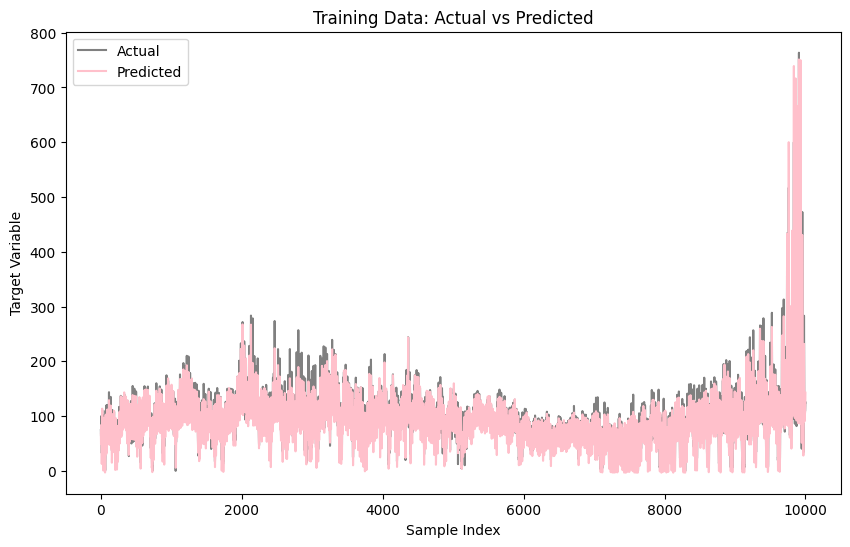

In [ ]:
def inverse_transform(scaled_array, scaler, feature_index=0, total_features=104):
    dummy = np.zeros((scaled_array.shape[0], total_features))
    dummy[:, feature_index] = scaled_array.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

with torch.no_grad():
    train_predictions = model(X_train.to(device)).to('cpu').numpy().flatten()


new_y_train = inverse_transform(y_train, scaler)
train_predictions = inverse_transform(train_predictions, scaler)

plt.figure(figsize=(10, 6))
plt.plot(new_y_train, color='gray', label='Actual')
plt.plot(train_predictions, color='pink', label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

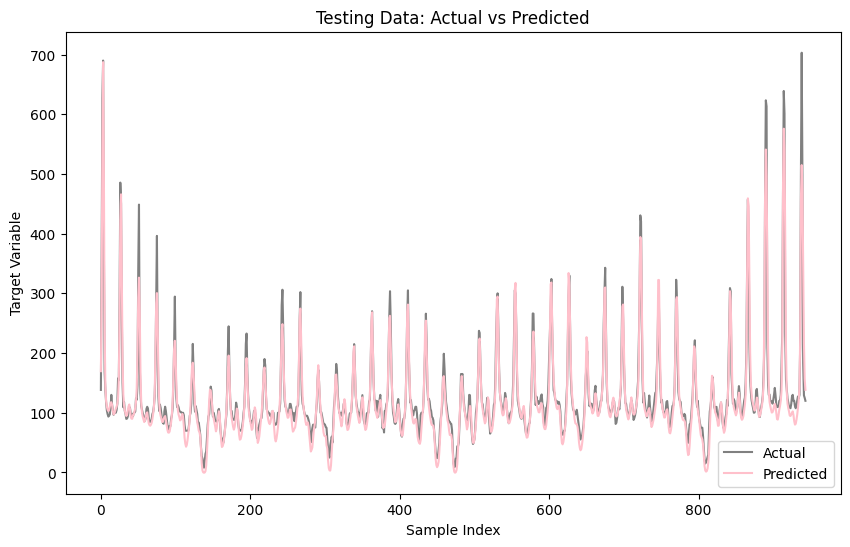

In [ ]:
with torch.no_grad():
    test_predictions = model(X_test.to(device)).to('cpu').numpy().flatten()

new_y_test = inverse_transform(y_test, scaler)
test_predictions = inverse_transform(test_predictions, scaler)

plt.figure(figsize=(10, 6))
plt.plot(new_y_test, color='gray', label='Actual')
plt.plot(test_predictions, color='pink', label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(new_y_train, train_predictions)
test_mse = mean_squared_error(new_y_test, test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Training MSE for lstm corr: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Testing MSE for lstm corr: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

Training MSE for lstm corr: 154.3969, RMSE: 12.4257
Testing MSE for lstm corr: 481.4560, RMSE: 21.9421


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(new_y_train, train_predictions)
test_mae = mean_absolute_error(new_y_test, test_predictions)

train_rmse_from_mae = np.sqrt(np.mean(np.abs(new_y_train - train_predictions)))
test_rmse_from_mae = np.sqrt(np.mean(np.abs(new_y_test - test_predictions)))

print(f"Training MAE for LSTM corr: {train_mae:.4f}, RMSE from MAE: {train_rmse_from_mae:.4f}")
print(f"Testing MAE for LSTM corr: {test_mae:.4f}, RMSE from MAE: {test_rmse_from_mae:.4f}")


Training MAE for LSTM corr: 9.1758, RMSE from MAE: 3.0292
Testing MAE for LSTM corr: 13.8683, RMSE from MAE: 3.7240


# Attention LSTM

In [ ]:
import torch
import torch.nn as nn

class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attention_weights = nn.Linear(hidden_size * 2, 1)  # For bidirectional LSTM

    def forward(self, lstm_output):
        # lstm_output: [batch_size, sequence_length, hidden_size * 2]
        attention_scores = self.attention_weights(lstm_output)  # [batch_size, sequence_length, 1]
        attention_weights = torch.softmax(attention_scores, dim=1)  # Normalize over the sequence length
        context_vector = torch.sum(attention_weights * lstm_output, dim=1)  # Weighted sum over sequence
        return context_vector, attention_weights


In [ ]:
class LSTMWithAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers, dropout_rate=0.2):
        super(LSTMWithAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True, bidirectional=True, dropout=dropout_rate)
        self.attention = Attention(hidden_size)  # Add the attention layer
        self.fc = nn.Linear(hidden_size * 2, 1)  # Fully connected layer for prediction

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers * 2, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers * 2, batch_size, self.hidden_size).to(device)

        lstm_output, _ = self.lstm(x, (h0, c0))
        context_vector, attention_weights = self.attention(lstm_output)  # Apply attention
        output = self.fc(context_vector)
        return output, attention_weights  # Return the attention weights for interpretability

In [ ]:
def train_one_epoch():
    model.train()
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output, _ = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

In [ ]:
def validate_one_epoch():
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for batch_index, batch in enumerate(test_loader):
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)
            output, _ = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss = running_loss / len(test_loader)
    print(f'Validation Loss: {avg_loss:.3f}')
    return avg_loss

In [ ]:
input_size = X_train.shape[-1]

input_size = X_train.shape[-1]
hidden_size =128
num_stacked_layers = 8

model = LSTMWithAttention(input_size, hidden_size, num_stacked_layers).to(device)
print(model)

LSTMWithAttention(
  (lstm): LSTM(103, 128, num_layers=8, batch_first=True, dropout=0.2, bidirectional=True)
  (attention): Attention(
    (attention_weights): Linear(in_features=256, out_features=1, bias=True)
  )
  (fc): Linear(in_features=256, out_features=1, bias=True)
)


In [ ]:
loss_function = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

In [ ]:
num_epochs = 100
patience = 20
best_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    train_one_epoch()
    val_loss = validate_one_epoch()
    scheduler.step(val_loss)

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
        print('Model saved.')
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

model.load_state_dict(torch.load('best_model.pth'))
model.eval()

Epoch 1/100
Validation Loss: 0.024
Model saved.
Epoch 2/100
Validation Loss: 0.017
Model saved.
Epoch 3/100
Validation Loss: 0.011
Model saved.
Epoch 4/100
Validation Loss: 0.025
Epoch 5/100
Validation Loss: 0.008
Model saved.
Epoch 6/100
Validation Loss: 0.009
Epoch 7/100
Validation Loss: 0.009
Epoch 8/100
Validation Loss: 0.012
Epoch 9/100
Validation Loss: 0.006
Model saved.
Epoch 10/100
Validation Loss: 0.006
Epoch 11/100
Validation Loss: 0.008
Epoch 12/100
Validation Loss: 0.005
Model saved.
Epoch 13/100
Validation Loss: 0.006
Epoch 14/100
Validation Loss: 0.005
Model saved.
Epoch 15/100
Validation Loss: 0.011
Epoch 16/100
Validation Loss: 0.004
Model saved.
Epoch 17/100
Validation Loss: 0.004
Epoch 18/100
Validation Loss: 0.006
Epoch 19/100
Validation Loss: 0.006
Epoch 20/100
Validation Loss: 0.004
Epoch 21/100
Validation Loss: 0.004
Epoch 22/100
Validation Loss: 0.006
Epoch 23/100
Validation Loss: 0.006
Epoch 24/100
Validation Loss: 0.005
Epoch 25/100
Validation Loss: 0.004
Epoch

<ipython-input-102-a4eccec6e44a>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


LSTMWithAttention(
  (lstm): LSTM(103, 128, num_layers=8, batch_first=True, dropout=0.2, bidirectional=True)
  (attention): Attention(
    (attention_weights): Linear(in_features=256, out_features=1, bias=True)
  )
  (fc): Linear(in_features=256, out_features=1, bias=True)
)

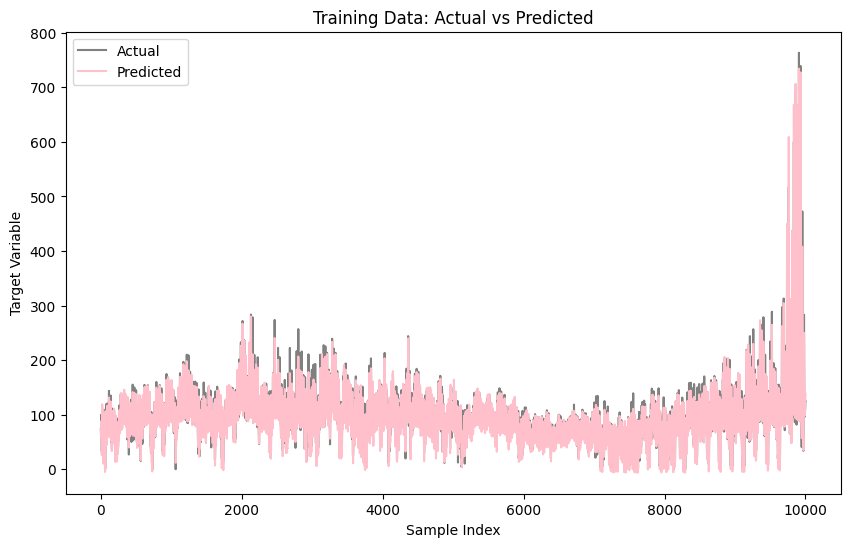

In [ ]:
def inverse_transform(scaled_array, scaler, feature_index=0, total_features=104):
    dummy = np.zeros((scaled_array.shape[0], total_features))
    dummy[:, feature_index] = scaled_array.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

with torch.no_grad():
    train_predictions, _ = model(X_train.to(device))
    train_predictions = train_predictions.to('cpu').numpy().flatten()


new_y_train = inverse_transform(y_train, scaler)
train_predictions = inverse_transform(train_predictions, scaler)

plt.figure(figsize=(10, 6))
plt.plot(new_y_train, color='gray', label='Actual')
plt.plot(train_predictions, color='pink', label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

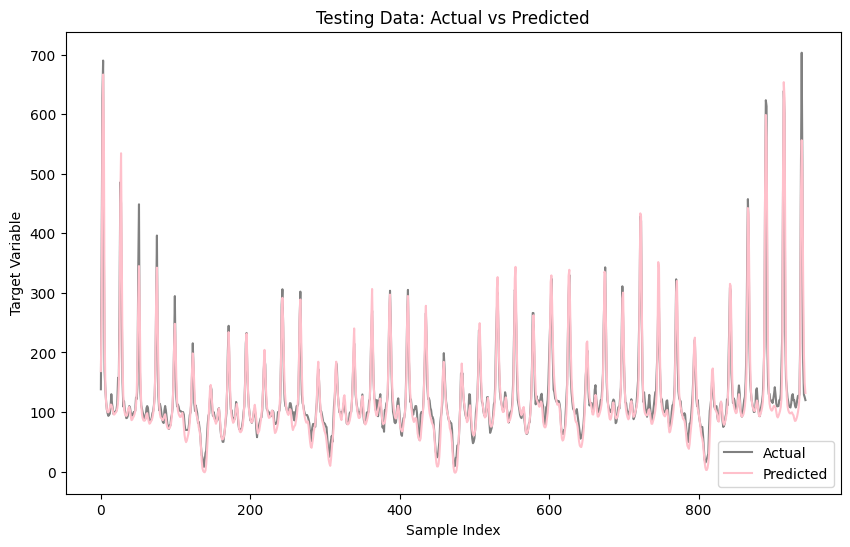

In [ ]:
with torch.no_grad():
    test_predictions, _ = model(X_test.to(device))
    test_predictions = test_predictions.to('cpu').numpy().flatten()

new_y_test = inverse_transform(y_test, scaler)
test_predictions = inverse_transform(test_predictions, scaler)

plt.figure(figsize=(10, 6))
plt.plot(new_y_test, color='gray', label='Actual')
plt.plot(test_predictions, color='pink', label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(new_y_train, train_predictions)
test_mse = mean_squared_error(new_y_test, test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Training MSE for lstm full with attention: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Testing MSE for lstm full with attention: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

Training MSE for lstm full with attention: 94.9063, RMSE: 9.7420
Testing MSE for lstm full with attention: 455.0842, RMSE: 21.3327


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(new_y_train, train_predictions)
test_mae = mean_absolute_error(new_y_test, test_predictions)

train_rmse_from_mae = np.sqrt(np.mean(np.abs(new_y_train - train_predictions)))
test_rmse_from_mae = np.sqrt(np.mean(np.abs(new_y_test - test_predictions)))

print(f"Training MAE for LSTM with Attention: {train_mae:.4f}, RMSE from MAE: {train_rmse_from_mae:.4f}")
print(f"Testing MAE for LSTM with Attention: {test_mae:.4f}, RMSE from MAE: {test_rmse_from_mae:.4f}")


Training MAE for LSTM with Attention: 7.1008, RMSE from MAE: 2.6647
Testing MAE for LSTM with Attention: 13.4366, RMSE from MAE: 3.6656


### Original df

In [ ]:
print(df.columns.tolist())

['MCP (Euro)', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'wpgt', 'pres', 'Day sin', 'Day cos', 'Year sin', 'Year cos', 'Import', 'Export', 'ae', 'tgp', 'tpp', 'cpie', 'hpp', 'spp', 'wpp', 'bp', 'tnp', 'tpp 2', 'cpie 2', 'hpp 2', 'spp 2', 'wpp 2', 'bp 2', 'tnp 2', 'dl', 'afc_x', 'fhc', 'Import natural gas', 'sb', 'tqe', 'efet', 'pbcpw', 'ltd', 'afc_y', 'Import mg', 'ib_mg', 'export_mg', 'ter_mg', 'Import kjf', 'ib_kjf', 'export_kjf', 'ter_kjf', 'Import dt', 'ib_dt', 'export_dt', 'ter_dt', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'Trend', 'Seasonal', 'Residual', 'MCV_lag1', 'MCV_lag2', 'MCP_lag1', 'MCP_lag2', 'MCP_lag3']


In [ ]:
df2 = df[['MCP (Euro)', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'MCV (MWh)', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'wpgt', 'pres','MCP_lag1', 'MCP_lag2', 'MCP_lag3', 'Trend', 'Seasonal', 'Residual',
 'year', 'hour', 'quarter', 'dayofyear', 'month', 'dayofweek']]

In [ ]:
df = df2

In [ ]:
df = df['MCP (Euro)']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from copy import deepcopy as dc

scaler = MinMaxScaler()

df_as_np = df.to_numpy().reshape(-1, 1)
df_st = scaler.fit_transform(df_as_np)

def create_sliding_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sliding_windows(df_st, window_size)

X = dc(np.flip(X, axis=1))

X.shape, y.shape

((10947, 10, 1), (10947, 1))

In [ ]:
X_train = X[:10000]
X_test = X[10000:]

y_train = y[:10000]
y_test = y[10000:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000, 10, 1), (947, 10, 1), (10000, 1), (947, 1))

In [ ]:
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class TSData(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

batch_size = 32
train_dataset = TSData(X_train, y_train)
test_dataset = TSData(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break

torch.Size([32, 10, 1]) torch.Size([32, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers, dropout_rate=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True, bidirectional=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers * 2, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers * 2, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
input_size = X_train.shape[-1]
hidden_size = 64
num_stacked_layers = 2

model = LSTM(input_size, hidden_size, num_stacked_layers).to(device)
print(model)

LSTM(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
loss_function = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

In [ ]:
num_epochs = 100
patience = 20
best_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    train_one_epoch()
    val_loss = validate_one_epoch()
    scheduler.step(val_loss)

    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
        print('Model saved.')
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

model.load_state_dict(torch.load('best_model.pth'))
model.eval()

Epoch 1/100
Validation Loss: 0.014
Model saved.
Epoch 2/100
Validation Loss: 0.012
Model saved.
Epoch 3/100
Validation Loss: 0.010
Model saved.
Epoch 4/100
Validation Loss: 0.009
Model saved.
Epoch 5/100
Validation Loss: 0.008
Model saved.
Epoch 6/100
Validation Loss: 0.007
Model saved.
Epoch 7/100
Validation Loss: 0.007
Model saved.
Epoch 8/100
Validation Loss: 0.006
Model saved.
Epoch 9/100
Validation Loss: 0.005
Model saved.
Epoch 10/100
Validation Loss: 0.005
Epoch 11/100
Validation Loss: 0.005
Model saved.
Epoch 12/100
Validation Loss: 0.004
Model saved.
Epoch 13/100
Validation Loss: 0.005
Epoch 14/100
Validation Loss: 0.004
Model saved.
Epoch 15/100
Validation Loss: 0.004
Model saved.
Epoch 16/100
Validation Loss: 0.005
Epoch 17/100
Validation Loss: 0.004
Epoch 18/100
Validation Loss: 0.006
Epoch 19/100
Validation Loss: 0.005
Epoch 20/100
Validation Loss: 0.004
Epoch 21/100
Validation Loss: 0.004
Model saved.
Epoch 22/100
Validation Loss: 0.005
Epoch 23/100
Validation Loss: 0.004

<ipython-input-23-a4eccec6e44a>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


LSTM(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

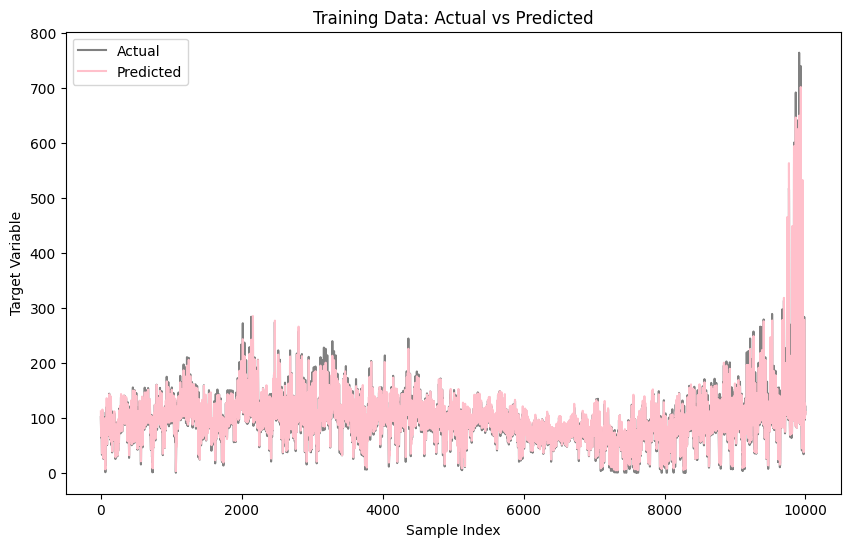

In [ ]:
def inverse_transform(scaled_array, scaler, feature_index=0, total_features=1):
    dummy = np.zeros((scaled_array.shape[0], total_features))
    dummy[:, feature_index] = scaled_array.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

with torch.no_grad():
    train_predictions = model(X_train.to(device)).to('cpu').numpy().flatten()


new_y_train = inverse_transform(y_train, scaler)
train_predictions = inverse_transform(train_predictions, scaler)

plt.figure(figsize=(10, 6))
plt.plot(new_y_train, color='gray', label='Actual')
plt.plot(train_predictions, color='pink', label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

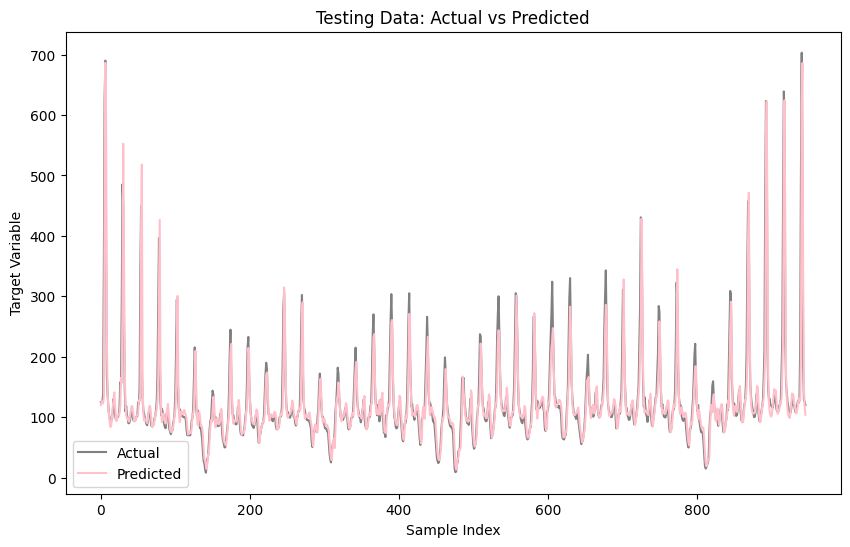

In [ ]:
with torch.no_grad():
    test_predictions = model(X_test.to(device)).to('cpu').numpy().flatten()

new_y_test = inverse_transform(y_test, scaler)
test_predictions = inverse_transform(test_predictions, scaler)

plt.figure(figsize=(10, 6))
plt.plot(new_y_test, color='gray', label='Actual')
plt.plot(test_predictions, color='pink', label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(new_y_train, train_predictions)
test_mse = mean_squared_error(new_y_test, test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Training MSE for lstm corr: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Testing MSE for lstm corr: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

Training MSE for lstm corr: 256.9592, RMSE: 16.0299
Testing MSE for lstm corr: 1387.6785, RMSE: 37.2516


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(new_y_train, train_predictions)
test_mae = mean_absolute_error(new_y_test, test_predictions)

train_rmse_from_mae = np.sqrt(np.mean(np.abs(new_y_train - train_predictions)))
test_rmse_from_mae = np.sqrt(np.mean(np.abs(new_y_test - test_predictions)))

print(f"Training MAE for LSTM with Attention: {train_mae:.4f}, RMSE from MAE: {train_rmse_from_mae:.4f}")
print(f"Testing MAE for LSTM with Attention: {test_mae:.4f}, RMSE from MAE: {test_rmse_from_mae:.4f}")

Training MAE for LSTM with Attention: 9.2683, RMSE from MAE: 3.0444
Testing MAE for LSTM with Attention: 18.6450, RMSE from MAE: 4.3180
